In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 数据预处理 - 特征归一化 ##

补：归一化的方法
- 线性函数归一化（[0,1])：$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$
- 零均值归一化（均值为0，标准差为1）：$z=\frac{x-\mu}{\sigma}$

In [12]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [13]:
def computeCost(X, y, theta):
	inner = np.power(((X * theta.T) - y), 2)
	return np.sum(inner) / (2 * len(X))

In [14]:
def gradientDescent(X, y, theta, alpha, iters):
	temp = np.matrix(np.zeros(theta.shape))
	parameters = int(theta.ravel().shape[1])
	cost = np.zeros(iters)
		
	for i in range(iters):
		error = (X * theta.T) - y
		
		for j in range(parameters):
			term = np.multiply(error, X[:,j])
			temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
		
		theta = temp
		cost[i] = computeCost(X, y, theta)
		
	return theta, cost

In [42]:
alpha = 0.3
iters = 50

In [ ]:
# add ones column
data2.insert(0, 'Ones', 1)

In [33]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [43]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13068657348400042

In [45]:
g2

matrix([[-1.11081357e-16,  8.84301429e-01, -5.27142612e-02]])

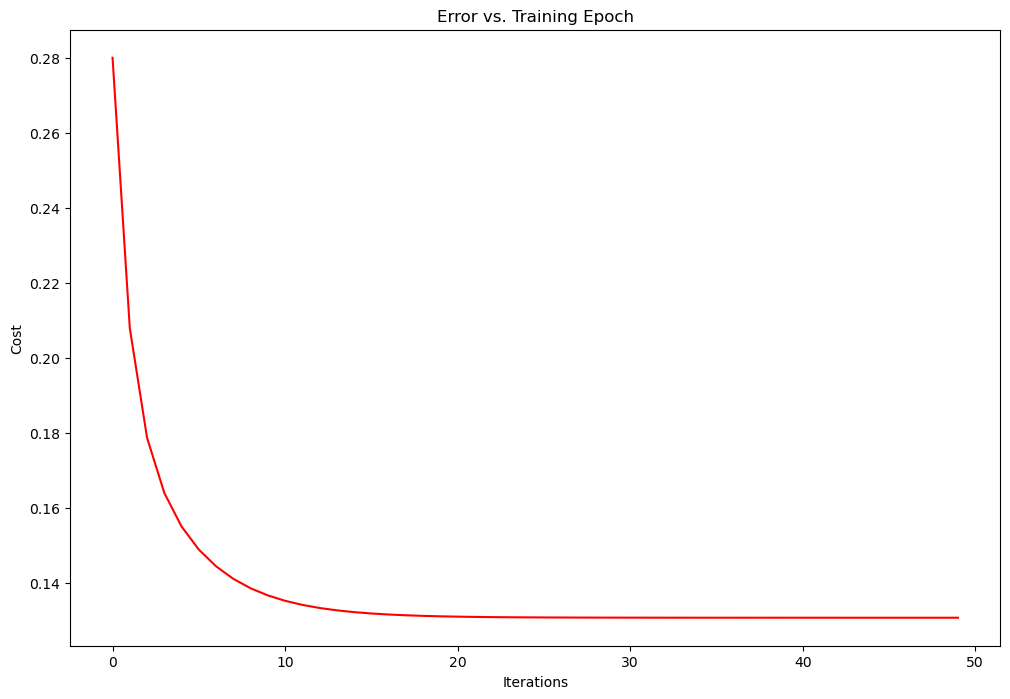

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### normal equation

In [50]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

In [ ]:
# add ones column
data2.insert(0, 'Ones', 1)

In [56]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
y2 = data2.iloc[:, cols - 1:cols]
# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [54]:
X2

,Ones,Size,Bedrooms
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4
5,1,1985,4
6,1,1534,3
7,1,1427,3
8,1,1380,3
9,1,1494,3


In [52]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [57]:
final_theta2=normalEqn(X2, y2)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[89597.9095428 ],
        [  139.21067402],
        [-8738.01911233]])

In [61]:
new_house = np.matrix([1, 1650, 3])
predicted_price = new_house * final_theta2
predicted_price

matrix([[293081.46433489]])